In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from numpy.core.defchararray import add

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # Xavier's initialization
from keras.optimizers import SGD 
from scipy.spatial.distance import cdist# Stochastic Gradient Descent


In [2]:
# Load data set
data = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fkrtl_not_transformation.csv')
data.drop(['Unnamed: 0', 'fkrtl-tanggal datang', 'FKRTL-ID Kunjungan', 'Nomor Peserta', 'fkrtl-tanggal pulang',
           'FKRTL-Provinsi Faskes', 'FKRTL-Kab/Kota Faskes', 'FKRTL-Provinsi Faskes Perujuk', 'FKRTL-Kab/Kota Faskes Perujuk', 
           'FKRTL-Kepemilikan Faskes Perujuk', 'FKRTL-Jenis Faskes Perujuk', 'FKRTL-Tipe Faskes Perujuk', 'Segmen Peserta yang Terdaftar', 
           'Kepemilikan Faskes yang Terdaftar', 'Jenis Faskes yang Terdaftar', 'Provinsi Peserta Terdaftar', 'Kab/Kota Peserta Terdaftar', 'fkrtl-Year',
          'FKRTL-Kode dan Nama Diagnosis Masuk', 'FKRTL-Kode dan Nama Diagnosis Sekunder', 'FKRTL-Kode dan Nama Diagnosis Primer', 'Status Kawin', 'Hubungan Keluarga',
          'fkrtl-Month', 'fkrtl-Hari Kunjungan', 'provinsi perujuk sama?', 'kab/kota perujuk sama?', 'Kelas Rawat Peserta', 'Umur', 'FKRTL-Biaya Verifikasi'], axis=1, inplace=True)

C:\Users\WIN10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906905 entries, 0 to 906904
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Hasil Rujukan FKTP?       906905 non-null  object
 1   fkrtl-Lama Kunjungan      906905 non-null  int64 
 2   fkrtl-Weekend?            906905 non-null  int64 
 3   fkrtl-Quarter             906905 non-null  int64 
 4   FKRTL-Kepemilikan Faskes  906905 non-null  object
 5   FKRTL-Jenis Faskes        906905 non-null  object
 6   FKRTL-Tipe Faskes         906905 non-null  object
 7   FKRTL-Tingkat Layanan     906905 non-null  object
 8   FKRTL-Segmen Peserta      906905 non-null  object
 9   FKRTL-Kelas Rawat         906905 non-null  object
 10  FKRTL-Status Pulang       906905 non-null  object
 11  FKRTL-Biaya Tagih         906905 non-null  int64 
 12  Jenis Kelamin Peserta     906905 non-null  object
 13  kategori umur             906905 non-null  object
dtypes: i

In [4]:
print("The number of numerical variables in the dataset : {}".format(data.select_dtypes(include=[np.number]).shape[1]))
print("The number of categorical variables in the dataset : {}".format(data.select_dtypes(exclude=[np.number]).shape[1]))

The number of numerical variables in the dataset : 4
The number of categorical variables in the dataset : 10


In [5]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

In [6]:
data_num

,fkrtl-Lama Kunjungan,fkrtl-Weekend?,fkrtl-Quarter,FKRTL-Biaya Tagih
0,4,1,1,1567100
1,14,0,3,20740600
2,8,0,1,3432700
3,4,0,4,4826600
4,3,0,4,1245400
...,...,...,...,...
906900,1,0,2,161000
906901,1,0,3,179700
906902,1,0,4,524300
906903,5,0,4,4060500


In [7]:
data['fkrtl-Weekend?'] = data['fkrtl-Weekend?'].astype('category')
data['fkrtl-Quarter'] = data['fkrtl-Quarter'].astype('category')

# Binning Numerical Feature

In [8]:
bins = np.linspace(min(data['FKRTL-Biaya Tagih']), max(data['FKRTL-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
data['biaya_tagih_binned'] = pd.cut(data['FKRTL-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

In [9]:
bins = np.linspace(min(data['fkrtl-Lama Kunjungan']), max(data['fkrtl-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
data['lama_kunjungan_binned'] = pd.cut(data['fkrtl-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [10]:
data_num = data.select_dtypes(include=[np.number])
data_cat = data.select_dtypes(exclude=[np.number])

# One Hot Encoding

In [11]:
one_hot_encoder = pd.get_dummies(data_cat, prefix_sep='_', drop_first=True)

In [18]:
one_hot_encoder

,Hasil Rujukan FKTP?_Yes,fkrtl-Weekend?_1,fkrtl-Quarter_2,fkrtl-Quarter_3,fkrtl-Quarter_4,FKRTL-Kepemilikan Faskes_MISSING,FKRTL-Kepemilikan Faskes_PEMERINTAH KABUPATEN/KOTA,FKRTL-Kepemilikan Faskes_PEMERINTAH PROVINSI,FKRTL-Kepemilikan Faskes_POLRI,FKRTL-Kepemilikan Faskes_SWASTA,...,kategori umur_lanjut usia,kategori umur_remaja,biaya_tagih_binned_murah,biaya_tagih_binned_standar,biaya_tagih_binned_mahal,biaya_tagih_binned_sangat mahal,lama_kunjungan_binned_sebentar,lama_kunjungan_binned_standar,lama_kunjungan_binned_lama,lama_kunjungan_binned_sangat lama
0,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906900,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
906901,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
906902,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
906903,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [12]:
one_hot_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906905 entries, 0 to 906904
Data columns (total 70 columns):
 #   Column                                              Non-Null Count   Dtype
---  ------                                              --------------   -----
 0   Hasil Rujukan FKTP?_Yes                             906905 non-null  uint8
 1   fkrtl-Weekend?_1                                    906905 non-null  uint8
 2   fkrtl-Quarter_2                                     906905 non-null  uint8
 3   fkrtl-Quarter_3                                     906905 non-null  uint8
 4   fkrtl-Quarter_4                                     906905 non-null  uint8
 5   FKRTL-Kepemilikan Faskes_MISSING                    906905 non-null  uint8
 6   FKRTL-Kepemilikan Faskes_PEMERINTAH KABUPATEN/KOTA  906905 non-null  uint8
 7   FKRTL-Kepemilikan Faskes_PEMERINTAH PROVINSI        906905 non-null  uint8
 8   FKRTL-Kepemilikan Faskes_POLRI                      906905 non-null  uint8
 9   FKRT

## Autoecoder 

In [13]:
# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(one_hot_encoder)

# AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)
input_df = Input(shape=(70 ,))  # The 70 features of our dataset

# Encoder
x = Dense(units=7, activation='relu')(input_df)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Bottleneck
encoded = Dense(units=10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Decoder
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
# we reconstruct the same number of features as the input
decoded = Dense(units=70 , kernel_initializer='glorot_uniform')(x)   

# Autoencoder
autoencoder = Model(input_df, decoded)
# Encoder
encoder = Model(input_df, encoded)

# autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# autoencoder.fit(x= normalized_df, y= normalized_df, batch_size=128, epochs=25,verbose=1)
# Use Autoencoder to reduce the number of features / dimensions
pred = encoder.predict(normalized_df)


### ** K-Means**

Menentukan jumlah cluster dengan elbow method

In [16]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(pred)
    kmeanModel.fit(pred)
 
    distortions.append(sum(np.min(cdist(pred, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / pred.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(pred, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / pred.shape[0]
    mapping2[k] = kmeanModel.inertia_

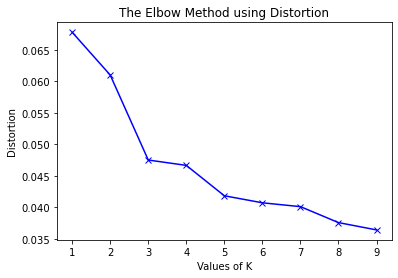

In [17]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

0.9532296288877716
1.0730034479368913
1.044292211201196
0.9493448704671195
1.192124189235192
1.1474111106706175
1.0786831035021294


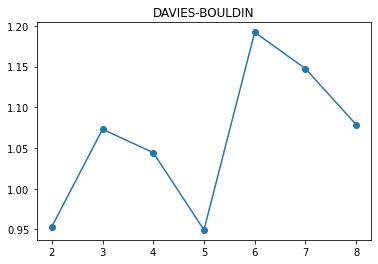

In [17]:
from sklearn.metrics import davies_bouldin_score
k = [2, 3, 4, 5, 6, 7, 8]
scores = []

for i in k:
    y_pred = KMeans(n_clusters = i, max_iter=1000, random_state = 43).fit_predict(pred)
    score = davies_bouldin_score(pred, y_pred)
    scores.append(score)
    print(score)

plt.plot(k, scores, 'o-')
plt.title('DAVIES-BOULDIN')
plt.show()

#### n=5

In [13]:
# Kmeans
kmeans_pca_5= KMeans(5)
kmeans_pca_5.fit(pred)
centroids = kmeans_pca_5.cluster_centers_
clusters = kmeans_pca_5.labels_


In [22]:
fkrtl_not_transform = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fkrtl_not_transformation.csv')

bins = np.linspace(min(fkrtl_not_transform['FKRTL-Biaya Tagih']), max(fkrtl_not_transform['FKRTL-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
fkrtl_not_transform['biaya_tagih_binned'] = pd.cut(fkrtl_not_transform['FKRTL-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

In [23]:
bins = np.linspace(min(fkrtl_not_transform['fkrtl-Lama Kunjungan']), max(fkrtl_not_transform['fkrtl-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
fkrtl_not_transform['lama_kunjungan_binned'] = pd.cut(fkrtl_not_transform['fkrtl-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [24]:
df_with_labels = pd.concat([fkrtl_not_transform, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels['Segment K-means Autoencoder'] = kmeans_pca_5.labels_
df_with_labels.to_csv('fkrtl_hasil_cluster_binning_autoencoder_5.csv')


In [14]:
from sklearn.metrics import silhouette_score

print(silhouette_score(pred, kmeans_pca_5.labels_))

0.42733786


In [25]:
kmeans_pca_5.inertia_

4457.5908203125

n=6

In [15]:
# Kmeans
kmeans_pca_6= KMeans(6)
kmeans_pca_6.fit(pred)
centroids = kmeans_pca_6.cluster_centers_
clusters = kmeans_pca_6.labels_


In [27]:
fkrtl_not_transform = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fkrtl_not_transformation.csv')

bins = np.linspace(min(fkrtl_not_transform['FKRTL-Biaya Tagih']), max(fkrtl_not_transform['FKRTL-Biaya Tagih']), 6)
kategori = ['sangat murah', 'murah', 'standar', 'mahal', 'sangat mahal']
fkrtl_not_transform['biaya_tagih_binned'] = pd.cut(fkrtl_not_transform['FKRTL-Biaya Tagih'], bins, labels=kategori, include_lowest=True)

C:\Users\WIN10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
bins = np.linspace(min(fkrtl_not_transform['fkrtl-Lama Kunjungan']), max(fkrtl_not_transform['fkrtl-Lama Kunjungan']), 6)
kategori = ['sangat sebentar', 'sebentar', 'standar', 'lama', 'sangat lama']
fkrtl_not_transform['lama_kunjungan_binned'] = pd.cut(fkrtl_not_transform['fkrtl-Lama Kunjungan'], bins, labels=kategori, include_lowest=True)

In [29]:
df_with_labels = pd.concat([fkrtl_not_transform, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels['Segment K-means Autoencoder'] = kmeans_pca_6.labels_
df_with_labels.to_csv('fkrtl_hasil_cluster_binning_autoencoder_6.csv')


In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(pred, kmeans_pca_6.labels_))

In [30]:
kmeans_pca_6.inertia_

3977.8056640625

In [ ]:
# from sklearn.metrics import silhouette_score
# k = [2, 3, 4, 5, 6, 7, 8]
# score=[]
# for n_cluster in k:
#     kmeans = KMeans(n_clusters=n_cluster).fit(final_principal)
#     score.append(silhouette_score(final_principal,kmeans.labels_))

# plt.plot(k, score, 'o-')
# plt.xlabel("Value for k")
# plt.ylabel("Silhouette score")
# plt.title('Silhouette Method')
# plt.show()

# VISUALISASI CLUSTER

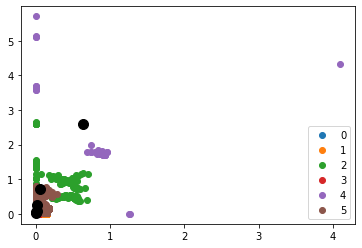

In [31]:
# Getting the Centroids
centroids = kmeans_pca_6.cluster_centers_
X = np.array(pred)
label = kmeans_pca_6.labels_
u_labels = np.unique(label)

#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()

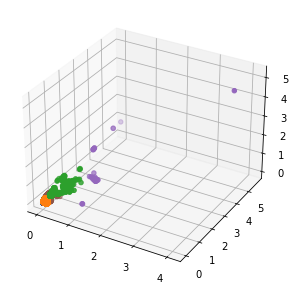

In [36]:
label = kmeans_pca_6.labels_
X = np.array(pred)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[label == 0,0],X[label == 0,1],X[label == 0,2])
ax.scatter(X[label == 1,0],X[label == 1,1],X[label == 1,2])
ax.scatter(X[label == 2,0],X[label == 2,1],X[label == 2,2])
ax.scatter(X[label == 3,0],X[label == 3,1],X[label == 3,2])
ax.scatter(X[label == 4,0],X[label == 4,1],X[label == 4,2])
ax.scatter(X[label == 5,0],X[label == 5,1],X[label == 5,2])
# ax.scatter(final_principal[label == 5,0],final_principal[label == 5,1],final_principal[label == 5,2])


In [25]:
fkrtl_not_transform = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/datasampel/fkrtl_not_transformation.csv')

C:\Users\WIN10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Analisis Hasil

In [28]:
fkrtl_segm_pca_kmeans = pd.concat([fkrtl_not_transform.reset_index(drop = True), pd.DataFrame(final_component_mca)], axis = 1)
fkrtl_segm_pca_kmeans.columns.values[-5: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5']

fkrtl_segm_pca_kmeans['Cluster'] = kmeans_pca_6.labels_

In [ ]:
fkrtl_segm_pca_kmeans

In [29]:
fkrtl_segm_pca_kmeans['Segment'] = fkrtl_segm_pca_kmeans['Cluster'].map({0:'first', 1:'second', 2:'third', 3:'fourth', 4:'fifth', 5:'sixth'})

In [30]:
fkrtl_segm_pca_kmeans.to_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/hasil cluster/fkrtl-mca-kmeans-full_6cluster.csv')

In [3]:
fkrtl_segm_pca_kmeans = pd.read_csv('D:/KULIAHHH/TUGAS AKHIR/TA-2/hasil cluster/fkrtl-pca-mca-kmeans-full.csv')

C:\Users\WIN10\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Visualisasi Cluster

C:\Users\WIN10\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


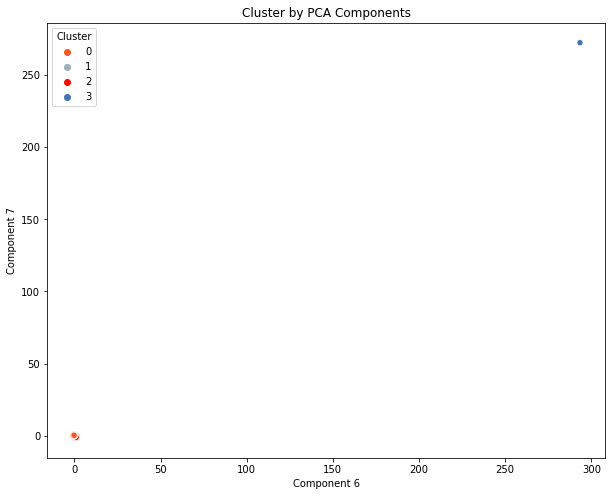

In [111]:
import seaborn as sns
x_axis = fkrtl_segm_pca_kmeans['Component 6']
y_axis = fkrtl_segm_pca_kmeans['Component 7']

plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = fkrtl_segm_pca_kmeans['Cluster'], palette = ['#f15a22', '#9db1bb', "#FF0B04", "#4374B3"])
plt.title('Cluster by PCA Components')
plt.show()

## Analisis Hasil Custer

In [36]:
# Hasil join dengan indikator left_only
options = ['first'] 

# selecting rows based on condition 
cluster1 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster1.head()

In [37]:
# Hasil join dengan indikator left_only
options = ['second'] 

# selecting rows based on condition 
cluster2 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster2.head()

In [38]:
# Hasil join dengan indikator left_only
options = ['third'] 

# selecting rows based on condition 
cluster3 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster3

In [39]:
# Hasil join dengan indikator left_only
options = ['fourth'] 

# selecting rows based on condition 
cluster4 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster4.head()

In [52]:
# Hasil join dengan indikator left_only
options = ['fifth'] 

# selecting rows based on condition 
cluster5 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster5.head()

In [51]:
# Hasil join dengan indikator left_only
options = ['sixth'] 

# selecting rows based on condition 
cluster6 = fkrtl_segm_pca_kmeans[fkrtl_segm_pca_kmeans['Segment'].isin(options)]
# cluster5.head()

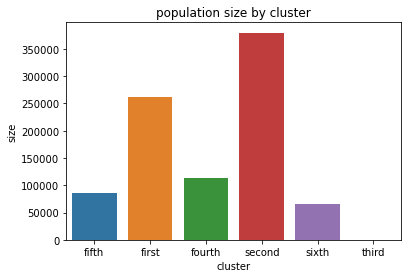

In [42]:
import seaborn as sns
cluster_size = []
for centroid, cluster_df in df_with_labels.groupby("Segment"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

In [43]:
print('Number of samples in:')
for cluster, df_cluster in fkrtl_segm_pca_kmeans.groupby('Segment'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster fifth -> 85321
cluster first -> 261671
cluster fourth -> 114178
cluster second -> 379631
cluster sixth -> 66103
cluster third -> 1


In [13]:
fkrtl_segm_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906905 entries, 0 to 906904
Data columns (total 54 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Unnamed: 0                              906905 non-null  int64  
 1   Unnamed: 0.1                            906905 non-null  int64  
 2   Hasil Rujukan FKTP?                     906905 non-null  object 
 3   provinsi perujuk sama?                  906905 non-null  object 
 4   kab/kota perujuk sama?                  906905 non-null  object 
 5   fkrtl-tanggal datang                    906905 non-null  object 
 6   fkrtl-tanggal pulang                    906905 non-null  object 
 7   fkrtl-Lama Kunjungan                    906905 non-null  int64  
 8   fkrtl-Hari Kunjungan                    906905 non-null  object 
 9   fkrtl-Weekend?                          906905 non-null  int64  
 10  fkrtl-Month                             9069

In [46]:
cluster1['FKRTL-Segmen Peserta'].value_counts()

PPU              105254
PBPU             101474
BUKAN PEKERJA     28928
PBI APBN          19064
PBI APBD           6869
MISSING              82
Name: FKRTL-Segmen Peserta, dtype: int64

In [54]:
(cluster6['FKRTL-Segmen Peserta'].value_counts()/fkrtl_segm_pca_kmeans['FKRTL-Segmen Peserta'].value_counts())*100

BUKAN PEKERJA     9.400030
MISSING           3.092784
PBI APBD          4.623644
PBI APBN          3.496225
PBPU              4.813496
PPU              10.153414
Name: FKRTL-Segmen Peserta, dtype: float64

In [17]:
print(cluster1['FKRTL-Biaya Tagih'].max())
print(cluster1['FKRTL-Biaya Tagih'].min())

238750000
64400


In [18]:
print(cluster2['FKRTL-Biaya Tagih'].max())
print(cluster2['FKRTL-Biaya Tagih'].min())

161451296
0


In [20]:
print(cluster3['FKRTL-Biaya Tagih'].max())
print(cluster3['FKRTL-Biaya Tagih'].min())

17839500
101500


In [21]:
print(cluster5['FKRTL-Biaya Tagih'].max())
print(cluster5['FKRTL-Biaya Tagih'].min())

178007696
83400


In [22]:
print(cluster4['FKRTL-Biaya Tagih'].max())
print(cluster4['FKRTL-Biaya Tagih'].min())

821900
821900
